# Gradient Descent 

In machine learning, the learning process often boils down to finding the optimal set of parameters (weights and biases) for a model. One powerful and widely used iterative optimization algorithm for achieving this is **Gradient Descent**.

To implement the Gradient Descent algorithm, we will focus on the task of linear regression. As a first step, we need some data to work with. Let's generate a synthetic dataset for this purpose.

In [29]:
# Import libararies

import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

### Generating the data

Here, we generate simulated data to evaluate the performance of our linear regression model. By introducing a known underlying relationship and controlled noise, we can visually and quantitatively assess how well the fitted regression line captures the true signal within the data's inherent variability.

In [95]:
# Input Data (Independent variable)
X = np.linspace(0, 20, 50)  # Generate 50 points evenly spaced between 0 and 20

# Set the random seed for reproducibility
np.random.seed(47)

# Target variable (Dependent variable) - with a strong linear relationship and noise
true_slope = 1.5
true_intercept = 4
noise = np.random.normal(0, 2, 50)  # Generate random noise

y = true_slope * X + true_intercept + noise

If you have your own specific dataset, you can define it using the Python code below. To use your data, simply remove the `#` symbol before the code lines in the following cell and then execute the cell. This will overwrite the previously generated simulated data with your custom values.

In [31]:
# Input Data (Independent variable)
# X = np.array([1, 2, 3, 3, 5, 6, 7, 8, 9, 10, 12])

# Target variable (Dependent variable)
# y = np.array([3, 5, 4, 6, 3, 8, 9, 10, 11, 13, 16])

### Create scatter plot

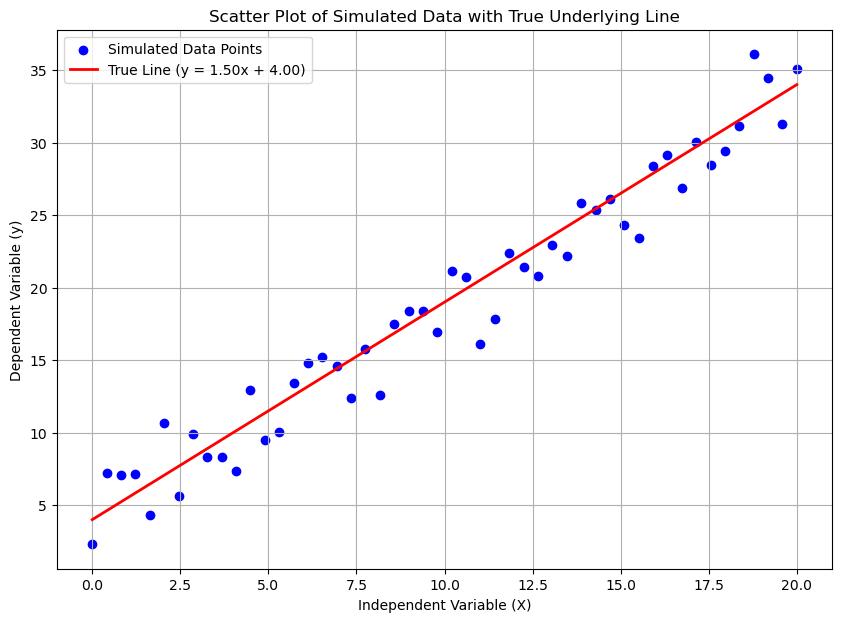

In [98]:
# Create the scatter plot
plt.figure(figsize=(10, 7))
plt.scatter(X, y, marker='o', color='blue', label='Simulated Data Points')

# Plot the true underlying line
true_y = true_slope * X + true_intercept
plt.plot(X, true_y, color='red', linestyle='-', linewidth=2, label=f'True Line (y = {true_slope:.2f}x + {true_intercept:.2f})')

# Add labels and title
plt.xlabel('Independent Variable (X)')
plt.ylabel('Dependent Variable (y)')
plt.title('Scatter Plot of Simulated Data with True Underlying Line')

# Add a legend
plt.legend()

# Add a grid for better readability
plt.grid(True)

# Show the plot
plt.show()

## Ordinary Least Squares (OLS)

Ordinary Least Squares (OLS) is another common method for estimating the parameters in a linear regression model. Unlike gradient descent, which is an iterative optimization algorithm, OLS provides a closed-form solution for the parameter estimates. This means we can directly calculate the optimal values without needing to go through multiple iterations.

For a linear regression model with one independent variable:

$\hat{y} = \beta_0 + \beta_1 x$

OLS aims to minimize the sum of the squared differences between the observed values ($y_i$) and the predicted values ($\hat{y}_i$). This is represented by the cost function:

$SSE = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 = \sum_{i=1}^{n} (y_i - (\beta_0 + \beta_1 x_i))^2$

where $n$ is the number of observations.

By using calculus to find the values of $\beta_0$ and $\beta_1$ that minimize this cost function, we arrive at the following closed-form solutions:

$\Large \hat{\beta}_1 = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2}$

$\Large \hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}$

where:
- $\hat{\beta}_1$ is the estimated slope.
- $\hat{\beta}_0$ is the estimated y-intercept.
- $x_i$ and $y_i$ are the individual data points.
- $\bar{x}$ is the mean of the independent variable $x$.
- $\bar{y}$ is the mean of the dependent variable $y$.

In essence, OLS directly calculates the line that best fits the data by minimizing the total squared error. While gradient descent iteratively approaches the minimum, OLS provides a direct calculation. The choice between these methods often depends on the size of the dataset, the complexity of the model, and computational resources. For large datasets or more complex models, gradient descent can be more computationally feasible. However, for smaller datasets and linear models, OLS offers a straightforward and exact solution.

Here we define a function for calculating the best parameters according to the OLS formulas.

In [99]:
def ols_estimate(X, y):

    n = X.size
    x_mean = np.mean(X)
    y_mean = np.mean(y)

    # Calculate the slope (b1)
    numerator = np.sum((X - x_mean) * (y - y_mean))
    denominator = np.sum((X - x_mean) ** 2)

    if denominator == 0:
        # Handle the case where there is no variance in X
        return y_mean, 0  # Slope is 0, intercept is the mean of y

    b1 = numerator / denominator

    # Calculate the intercept (beta_0)
    b0 = y_mean - b1 * x_mean

    return b0, b1

In [100]:
b0, b1 = ols_estimate(X, y)

print("Intercept (b0):", round(b0,2))
print("Slope (b1):", round(b1,2))

Intercept (b0): 3.99
Slope (b1): 1.47


The result closely approximates the true line. Let's see the fitted linear model.

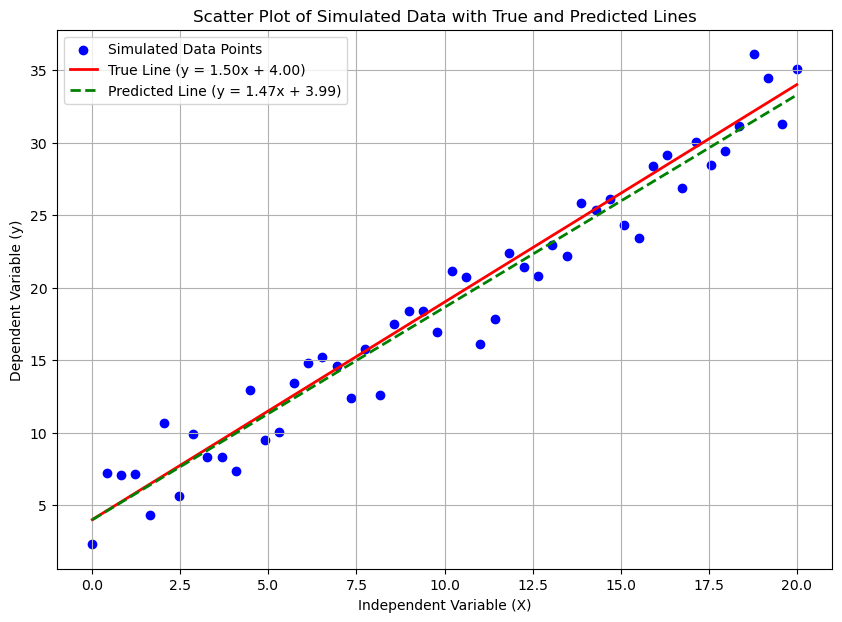

In [101]:
# Linear model
y_pred = b1 * X + b0

# Create the scatter plot
plt.figure(figsize=(10, 7))
plt.scatter(X, y, marker='o', color='blue', label='Simulated Data Points')

# Plot the true underlying line
true_y = true_slope * X + true_intercept
plt.plot(X, true_y, color='red', linestyle='-', linewidth=2, label=f'True Line (y = {true_slope:.2f}x + {true_intercept:.2f})')

# Plot the predicted line
plt.plot(X, y_pred, color='green', linestyle='--', linewidth=2, label=f'Predicted Line (y = {b1:.2f}x + {b0:.2f})')


# Add labels and title
plt.xlabel('Independent Variable (X)')
plt.ylabel('Dependent Variable (y)')
plt.title('Scatter Plot of Simulated Data with True and Predicted Lines')

# Add a legend
plt.legend()

# Add a grid for better readability
plt.grid(True)

# Show the plot
plt.show()

As you can see, this visually demonstrates how well our fitted line approximates the true function.

You can also calculate the parameters using built-in functions in statsmodels.

In [102]:
# Add a constant column to the input variables
X_= sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X_)
results = model.fit()

# Retrieve the estimated coefficients
b0 = results.params[0]  # Intercept
b1 = results.params[1]  # Slope

print("Intercept (b0):", round(b0,2))
print("Slope (b1):", round(b1,2))

Intercept (b0): 3.99
Slope (b1): 1.47


# Gradient Descent


Now, we will implement the gradient descent algorithm to determine the parameters for linear regression.

The linear regression model can be represented by the following equation:

$\hat{y} = \beta_0 + \beta_1 x$

where:
- $\hat{y}$ is the predicted value of the dependent variable.
- $x$ is the independent variable.
- $\beta_0$ is the y-intercept.
- $\beta_1$ is the slope.

The gradient descent algorithm iteratively updates the parameters to minimize the cost function. The update rule for each parameter is given by:

$\beta_j := \beta_j - \alpha \frac{\partial J(\beta_0, \beta_1)}{\partial \beta_j}$

where:
- $\beta_j$ represents the parameter being updated (either $\beta_0$ or $\beta_1$).
- $\alpha$ is the learning rate, a positive scalar that determines the step size at each iteration.
- $\frac{\partial J(\beta_0, \beta_1)}{\partial \beta_j}$ is the partial derivative of the cost function $J$ with respect to $\beta_j$.

For linear regression with a mean squared error (MSE) cost function:

$J(\beta_0, \beta_1) = \frac{1}{2n} \sum_{i=1}^{n} (h_{\beta}(x^{(i)}) - y^{(i)})^2$

where:
- $n$ is the number of training examples.
- $h_{\beta}(x^{(i)}) = \beta_0 + \beta_1 x^{(i)}$ is the hypothesis function.
- $y^{(i)}$ is the actual value of the dependent variable for the $i$-th training example.

The partial derivatives of the MSE cost function with respect to $\beta_0$ and $\beta_1$ are:

$\frac{\partial J(\beta_0, \beta_1)}{\partial \beta_0} = \frac{1}{n} \sum_{i=1}^{n} (h_{\beta}(x^{(i)}) - y^{(i)})$

$\frac{\partial J(\beta_0, \beta_1)}{\partial \beta_1} = \frac{1}{n} \sum_{i=1}^{n} (h_{\beta}(x^{(i)}) - y^{(i)}) x^{(i)}$

Therefore, the gradient descent update rules for linear regression become:

$\beta_0 := \beta_0 - \alpha \frac{1}{n} \sum_{i=1}^{n} ((\beta_0 + \beta_1 x^{(i)}) - y^{(i)})$

$\beta_1 := \beta_1 - \alpha \frac{1}{n} \sum_{i=1}^{n} ((\beta_0 + \beta_1 x^{(i)}) - y^{(i)}) x^{(i)}$

We will iteratively apply these update rules until convergence to find the optimal values for $\beta_0$ and $\beta_1$.

## Gradient Descent Implementation

In the following code cell, we will implement a basic version of the gradient descent algorithm. This implementation will run for a fixed number of steps. To achieve convergence to the optimal solution, careful selection of hyperparameters such as the `learning_rate` and `Max_Steps` is crucial.

In [107]:
# Initial parameter values (You can change these hyperparameters)
b0 = 2
b1 = 3

# Learning rate
learning_rate = 0.01

# Maximum Number of steps
Max_Steps = 1500

# Number of Samples
n = len(X)

# Perform gradient descent
for step in range(Max_Steps):
    
    if step%100 == 0: #print the results once for each 10 steps
        print(f"the line at the start of iteration {step+1} is y = {round(b0,3)} + {round(b1,3)} * X")

    # Calculate predicted values
    y_hat = b0 + b1 * X

    # Calculate sum of squared errors
    error = y_hat-y
    MSE = np.sum(error**2)/n

    # Calculate gradients
    gradient_b0 = np.mean(error)
    gradient_b1 = np.mean(error * X)

    # Update parameters
    update_b0 = learning_rate * gradient_b0
    update_b1 = learning_rate * gradient_b1
    b0 -= update_b0
    b1 -= update_b1

    if step%100 == 0: #print the results once for each 10 steps
        print(f"Iteration {step+1}:")
        print("Sum of Squared Errors:", round(MSE,3))
        print("Gradient with respect to b0:", round(gradient_b0,3))
        print("Gradient with respect to b1:", round(gradient_b1,3))
        print("Update for b0:", round(update_b0,3))
        print("Update for b1:", round(update_b1,3))
        print("Updated b0:", round(b0,3))
        print("Updated b1:", round(b1,3))
        print()
    
    
print("\nGradient descent finished.")
print(f"Final parameters: b0 = {round(b0, 3)}, b1 = {round(b1, 3)}")
print(f"Resulting line of best fit: y = {round(b0, 4)} + {round(b1, 3)}.X")

the line at the start of iteration 1 is y = 2 + 3 * X
Iteration 1:
Sum of Squared Errors: 263.97
Gradient with respect to b0: 13.362
Gradient with respect to b1: 186.877
Update for b0: 0.134
Update for b1: 1.869
Updated b0: 1.866
Updated b1: 1.131

the line at the start of iteration 101 is y = 2.37 + 1.585 * X
Iteration 101:
Sum of Squared Errors: 4.348
Gradient with respect to b0: -0.414
Gradient with respect to b1: 0.031
Update for b0: -0.004
Update for b1: 0.0
Updated b0: 2.374
Updated b1: 1.585

the line at the start of iteration 201 is y = 2.736 + 1.558 * X
Iteration 201:
Sum of Squared Errors: 4.077
Gradient with respect to b0: -0.321
Gradient with respect to b1: 0.024
Update for b0: -0.003
Update for b1: 0.0
Updated b0: 2.739
Updated b1: 1.558

the line at the start of iteration 301 is y = 3.019 + 1.537 * X
Iteration 301:
Sum of Squared Errors: 3.916
Gradient with respect to b0: -0.248
Gradient with respect to b1: 0.018
Update for b0: -0.002
Update for b1: 0.0
Updated b0: 3.022


The results indicate that the gradient descent algorithm finds the optimal answer(at least the near optimal answer) within a number of steps.

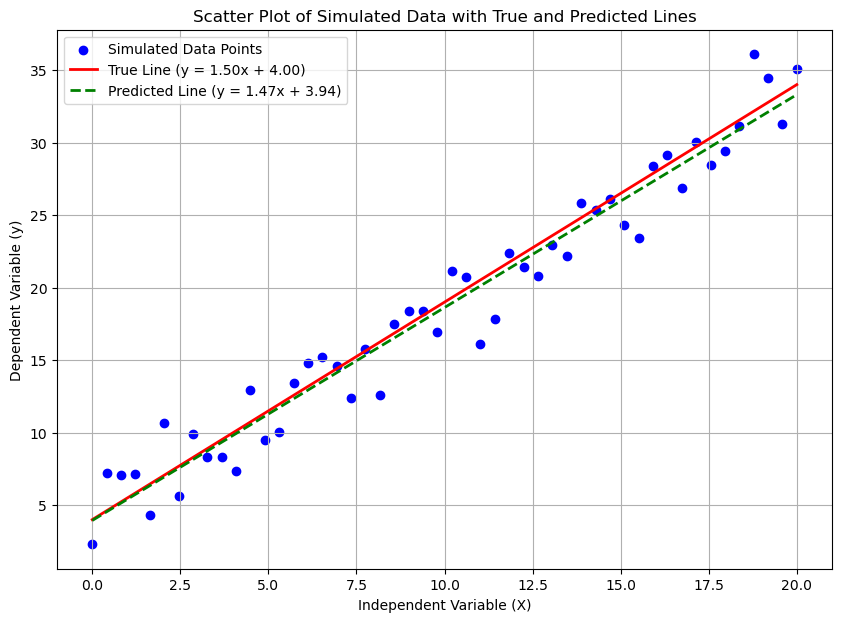

In [106]:
# Linear model
y_pred = b1 * X + b0

# Create the scatter plot
plt.figure(figsize=(10, 7))
plt.scatter(X, y, marker='o', color='blue', label='Simulated Data Points')

# Plot the true underlying line
true_y = true_slope * X + true_intercept
plt.plot(X, true_y, color='red', linestyle='-', linewidth=2, label=f'True Line (y = {true_slope:.2f}x + {true_intercept:.2f})')

# Plot the predicted line
plt.plot(X, y_pred, color='green', linestyle='--', linewidth=2, label=f'Predicted Line (y = {b1:.2f}x + {b0:.2f})')


# Add labels and title
plt.xlabel('Independent Variable (X)')
plt.ylabel('Dependent Variable (y)')
plt.title('Scatter Plot of Simulated Data with True and Predicted Lines')

# Add a legend
plt.legend()

# Add a grid for better readability
plt.grid(True)

# Show the plot
plt.show()